<a href="https://colab.research.google.com/github/sbbwoy/ESAA/blob/main/220603_part3_Keras_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##6. 모델 저장 및 불러오기

In [12]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train_), (x_test, y_test) = mnist.load_data()

x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(256, activation = 'relu'),
                             tf.keras.layers.Dense(64, activation = 'relu'),
                             tf.keras.layers.Dense(62, activation = 'relu'),
                             
                             tf.keras.layers.Dense(10, activation = 'softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

###모델을 파일로 저장

저장형식
- HDF5
- SavedModel

In [13]:
#모델을 h5 포맷으로 저장
model.save('h5-model.h5')

In [14]:
h5_model = tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 64)                16448     
                                                                 
 dense_6 (Dense)             (None, 62)                4030      
                                                                 
 dense_7 (Dense)             (None, 10)                630       
                                                                 
Total params: 222,068
Trainable params: 222,068
Non-trainable params: 0
_________________________________________________________________


In [15]:
#모델 검증
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss:.5f}, {acc:.5f}')

h5 model] loss: 2.33871, 0.38430


In [16]:
#모델을 SavedModel 포맷으로 저장
model.save('saved-model')

INFO:tensorflow:Assets written to: saved-model/assets


In [17]:
#모델 복원
saved_model = tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 64)                16448     
                                                                 
 dense_6 (Dense)             (None, 62)                4030      
                                                                 
 dense_7 (Dense)             (None, 10)                630       
                                                                 
Total params: 222,068
Trainable params: 222,068
Non-trainable params: 0
_________________________________________________________________


In [18]:
#모델 검증
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss:.5f}, acc: {acc:.5f}')

#모델 검증
loss, acc = saved_model.evaluate(x_test, y_test, verbose=0)
print(f'saved_model] loss: {loss:.5f}, acc: {acc:.5f}')


h5 model] loss: 2.33871, acc: 0.38430
saved_model] loss: 2.33871, acc: 0.38430


##7. 복잡한 모델 생성

###함수형 API(Functional API)

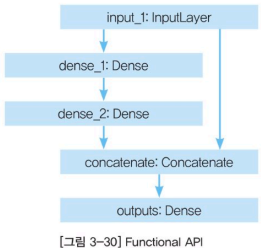

- 입력 매개변수를 여러 개 갖는 다중 입력, 함수의 return 값을 여러 개 갖는 다중 출력, 같은 레벨에 여러 개의 층을 배치해 입출력을 공유하는 구조 가능

In [26]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(256, activation = 'relu'),
                             tf.keras.layers.Dense(64, activation = 'relu'),
                             tf.keras.layers.Dense(62, activation = 'relu'),
                             
                             tf.keras.layers.Dense(10, activation = 'softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
#모델의 레이어를 체인 구조로 연결
input_layer = tf.keras.Input(shape=(28, 28), name = 'InputLayer')

#모델의 레이어를 체인 구조로 연결
x1 = tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu', name = 'Dense1')(x1)
x3 = tf.keras.layers.Dense(256, activation='relu', name = 'Dense2')(x2)
x4 = tf.keras.layers.Dense(256, activation='relu', name = 'Dense3')(x3)

In [23]:
#모델 생성
func_model = tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

#모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 256)               65792     
                                                                 
 Dense3 (Dense)              (None, 256)               65792     
                                                                 
Total params: 332,544
Trainable params: 332,544
Non-trainable params: 0
_________________________________________________________________


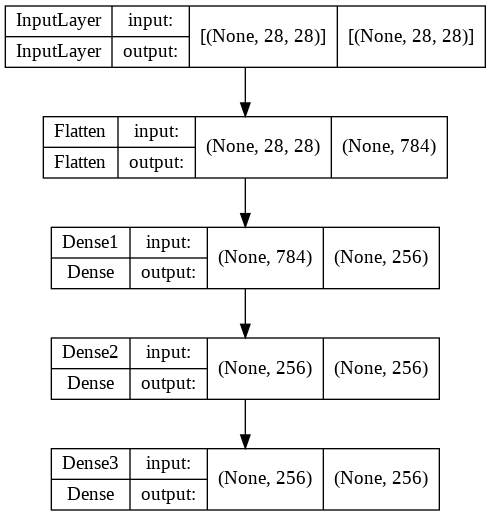

In [24]:
from tensorflow.keras.utils import plot_model
#구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [27]:
#컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#훈련
func_model.fit(x_train, y_train, epochs=3)

#검증
loss, acc = func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 11s 6ms/step - loss: 5.4864 - accuracy: 0.1164
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 5.5452 - accuracy: 0.0987
Epoch 3/3
1875/1875 [==============================] - 10s 5ms/step - loss: 5.5452 - accuracy: 0.0987
Functional Model] loss: 5.54629, acc: 0.09800


###모델 서브클래싱Model Subclassing

In [32]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        #초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [33]:
#모델 생성
mymodel = MyModel()

#모델의 이름 설정
mymodel._name = 'subclass_model'

#모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

#모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         multiple                  0         
                                                                 
 dense_16 (Dense)            multiple                  200960    
                                                                 
 dense_17 (Dense)            multiple                  16448     
                                                                 
 dense_18 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [35]:
#컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#훈련
mymodel.fit(x_train, y_train, epochs=3)

#검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0475 - accuracy: 0.9842
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0353 - accuracy: 0.9881
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0273 - accuracy: 0.9912
Subclassing Model] loss: 0.07054, acc: 0.98160


###서브클래싱 모델 파라미터를 활용한 생성

In [36]:
class MyModel(tf.keras.Model):
    #생성자 파라미터 추가
    def __init__(self, units, num_classes):
        super(MyModel, self).__init__()
        #초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units, activation = 'relu')
        self.dense2 = tf.keras.layers.Dense(units/4, activation='relu')
        self.dense3 = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [39]:
#모델 생성
mymodel = MyModel(256, 10)

#모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

#모델 요약
mymodel.summary()

Model: "my_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         multiple                  0         
                                                                 
 dense_19 (Dense)            multiple                  200960    
                                                                 
 dense_20 (Dense)            multiple                  16448     
                                                                 
 dense_21 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [40]:
#컴파일
mymodel.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#훈련
mymodel.fit(x_train, y_train, epochs=3)

#검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model w, parameters] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2223 - accuracy: 0.9347
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0907 - accuracy: 0.9719
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0618 - accuracy: 0.9812
Subclassing Model w, parameters] loss: 0.08491, acc: 0.97480
